In [1]:
import pandas as pd
import yellowbrick as yb


/var/folders/x3/k4hl686x0jb6bj0ky2fbhwlw0000gn/T/ipykernel_9054/1291734411.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  vis.fig.show()


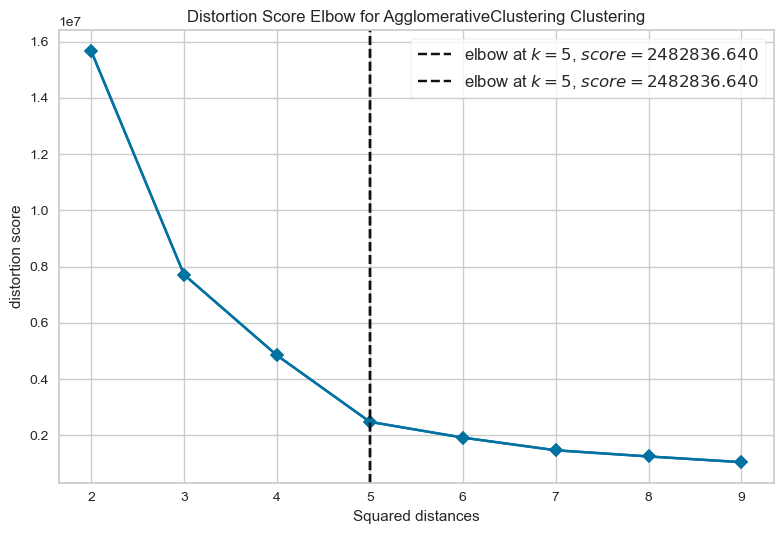

In [2]:
from yellowbrick.cluster import kelbow_visualizer
from yellowbrick.datasets import load_nfl
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib
X, y = load_nfl()

model1 = AgglomerativeClustering()
vis = kelbow_visualizer(model1, X, k=(2,10), timings=False, distance_metric='euclidean', metric='distortion', show=False)
vis.fit(X)
vis.finalize()
vis.ax.set_xlabel('Squared distances')
vis.fig.tight_layout()
vis.fig.show()

In [3]:
from yellowbrick.cluster import KElbowVisualizer
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import pairwise_distances
from yellowbrick.cluster.base import ClusteringScoreVisualizer
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

class GapStatisticVisualizer(ClusteringScoreVisualizer):
    def __init__(self, estimator, k_range=(2,10), n_references=100, ax=None, title="Gap Statistic for Optimal Number of Clusters", **kwargs):
        super().__init__(estimator, ax=ax, **kwargs)
        self.k_range = k_range
        self.n_references = n_references
        self.title = title


    def draw(self):
        vis = KElbowVisualizer(model, k=(2,10), timings=False, distance_metric='euclidean', metric='distortion', ax=self.ax)
        vis.show()
        plt.clf()
        
# Generate synthetic dataset



/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/yellowbrick/base.py:236: YellowbrickWarning: GapStatisticVisualizer does not have a reference to a matplotlib.Axes the figure may not render as expected!
  warnings.warn(


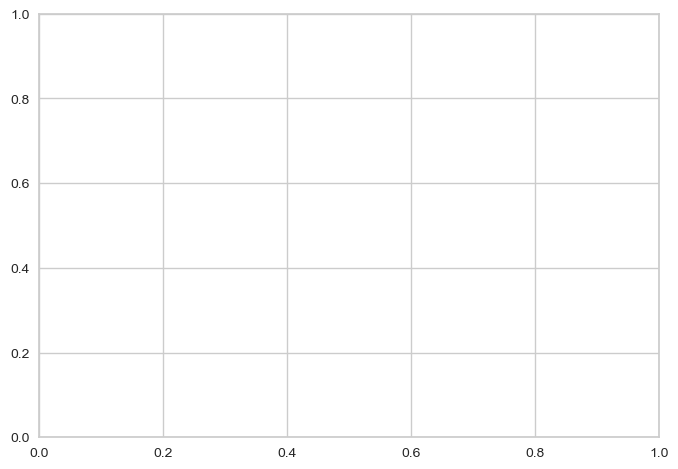

<Axes: >

In [4]:
data, _ = make_blobs(n_samples=1000, centers=4, random_state=42)

# Instantiate the clustering model and visualizer for AgglomerativeClustering
model = AgglomerativeClustering()
visualizer = GapStatisticVisualizer(model, k_range=(2,10))

# Fit the data and visualize
visualizer.fit(data)
visualizer.show()

/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/yellowbrick/base.py:236: YellowbrickWarning: GapStatisticVisualizer does not have a reference to a matplotlib.Axes the figure may not render as expected!
  warnings.warn(


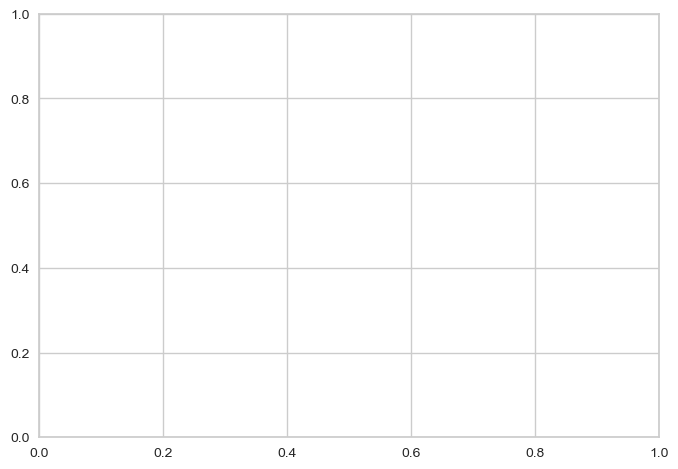

<Axes: >

In [5]:
data, _ = make_blobs(n_samples=1000, centers=4, random_state=42)

# Instantiate the clustering model and visualizer for AgglomerativeClustering
model = KMeans(n_init='auto')
visualizer = GapStatisticVisualizer(model, k_range=(2,10))

# Fit the data and visualize
visualizer.fit(data)
visualizer.show()

In [6]:
experiments_and_data = {
    'seeds-dataset':  {
        'loc': '../data/seeds-dataset/rq2-nd.csv',
        '2': ['area', 'perimeter'],
        '3': ['area', 'perimeter', 'length of kernel'],
        'n': ['area', 'perimeter', 'length of kernel', 'compactness', 'width of kernel', 'asymmetry coefficient', 'length of kernel groove'],
    },
    'heart-dataset': {
        'loc': '../data/heart-dataset/heart_numerical.csv',
        '2': ['baseline value', 'histogram_min'],
        '3': ['baseline value', 'histogram_min', 'accelerations'],
        'n': ['baseline value', 'histogram_min', 'accelerations', 'fetal_movement', 'uterine_contractions', 'light_decelerations', 'histogram_width', 'histogram_max', 'histogram_number_of_peaks']
    },
    'circle-dataset': {
        'loc': './data/circle_1000_3d.csv',
        '2': ['x1', 'x2'],
        '3': ['x1', 'x2', 'x3']
    },
    'line-dataset': {
        'loc': './data/line_1000_3d.csv',
        '2': ['x1', 'x2'],
        '3': ['x1', 'x2', 'x3'],
    },
    'skewed-dataset': {
        'loc': './data/skewed_1000_3d.csv',
        '2': ['x1', 'x2'],
        '3': ['x1', 'x2', 'x3'],
    }
}

In [13]:
from sklearn.preprocessing import StandardScaler
from Helpers import helpers
import pandas as pd
def run_for_all_experiments():
    for dataset in ['seeds-dataset', 'heart-dataset', 'circle-dataset', 'line-dataset', 'skewed-dataset']:
        dataset_obj = experiments_and_data[dataset]
        for dimension in ['2', '3', 'n']:
            if dimension in dataset_obj:
                dataset_df =helpers.load_dataset(dataset_obj['loc'])
                dataset_df_columns = dataset_obj[dimension]
                dataset_df_scaled = pd.DataFrame(StandardScaler().fit_transform(dataset_df[dataset_df_columns]), columns=dataset_df_columns)

                model_kmeans = KMeans(n_init='auto')
                model_agglomerative = AgglomerativeClustering(metric='euclidean', linkage='ward')
                vis_algglomerative = KElbowVisualizer(model_agglomerative, k=(2,10), timings=False, distance_metric='euclidean', locate_elbow=False, metric='silhouette', title=f"Elbow for Optimal Number of Clusters for Agglomerative Clustering: {dataset} with {dimension} dimensions")
                vis_algglomerative.fit(dataset_df_scaled[dataset_df_columns])
                vis_algglomerative.ax.set_xlabel('Squared distances')
                vis_algglomerative.show(outpath=f"./results/test/{dataset}-{dimension}-agglomerative.png", clear_figure=True)
                #vis_algglomerative.finalize()
                vis_kmeans = KElbowVisualizer(model_kmeans, k=(2,10), timings=False,distance_metric='euclidean', metric='silhouette', locate_elbow=False, title=f"Elbow for Optimal Number of Clusters for KMeans: {dataset} with {dimension} dimensions")
                vis_kmeans.fit(dataset_df_scaled[dataset_df_columns])
                vis_kmeans.show(outpath=f"./results/test/{dataset}-{dimension}-kmeans.png", clear_figure=True)
                #vis_kmeans.ax.set_xlabel('Squared distances')
                #vis_kmeans.finalize()
                
        

In [14]:
run_for_all_experiments()

<Figure size 800x550 with 0 Axes>